### Black Friday Price Prediction
Black Friday is a colloquial term for the Friday following Thanksgiving Day in the United States. In this notebook we'll do the prediction of purchase on black friday based on different criteria. Going through this notebook I'll do Exploratory Data Analysis.
You will get the dataset from: https://www.kaggle.com/sdolezel/black-friday

In [1]:
# import the required libraries

# Libraries for data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# import datasets

df = pd.read_csv('train.csv') # train data
test_df = pd.read_csv('test.csv') # test data

df.head() # check the train dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# check the shape of the trainset
df.shape

(550068, 12)

In the dataset there are 550068 rows and 12 columns including the target

In [4]:
# checking the basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Now check the statistical information about the dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Here we found some infomative statistics from the dataset. We can see total number count in "Product_Category_2" & "Product_Category_3" are less than other count which indicates there are some problems. Apart from that we can see that the purchase has a mean of 9263.96 with a standard deviation of 5023.065.

# Exploratory Data Analysis (EDA)

First I'll do some univariate analysis & then I move to the bivariate or multivariate analysis

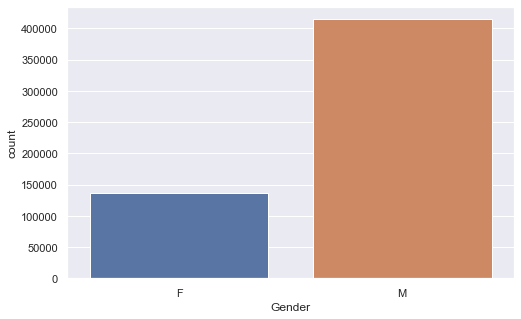

In [6]:
# checking the ratio of gender in this dataset

plt.figure(figsize=(8,5))
sns.countplot(x ='Gender', data = df)
plt.show()

In this dataset most of the customers are Male. It's almost three times than that of female customers

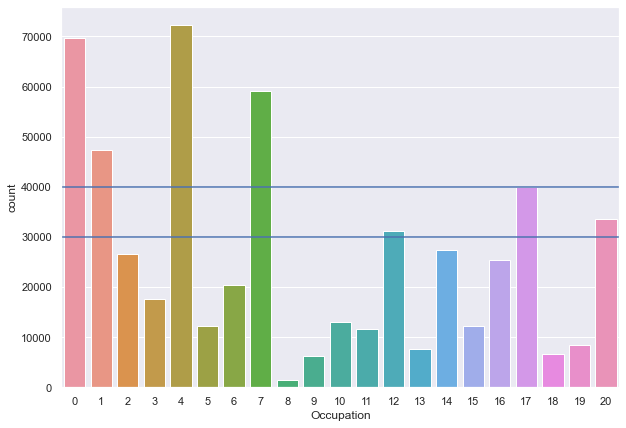

In [7]:
# now let's check the occupation of the dataset

plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Occupation')
plt.axhline(y = 40000)
plt.axhline(y = 30000)
plt.show()

Here we can see that the "Occupation" category "0,1,4,7,17" are high in this dataset and their count is more than 40000. and "12,20" are two category their count is more than 30000 and less than 40000

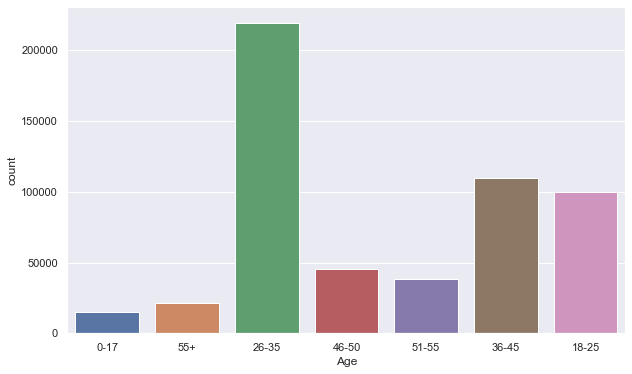

In [8]:
# Now, let's check for the age group of this dataset

plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Age')
plt.show()

Here we can clearly see that the age group "26-35" have the highest value. which means this group contain the most of the customers and "36-45 & 18-25" are the second and third highest age gouped customers

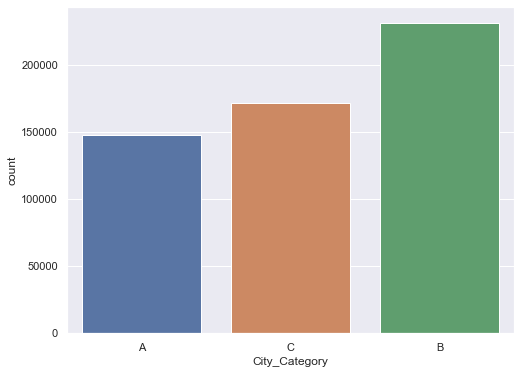

In [9]:
# check for the city category
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'City_Category')
plt.show()

The city_category B has the highest sales. and the category C and A are the second and third respectly

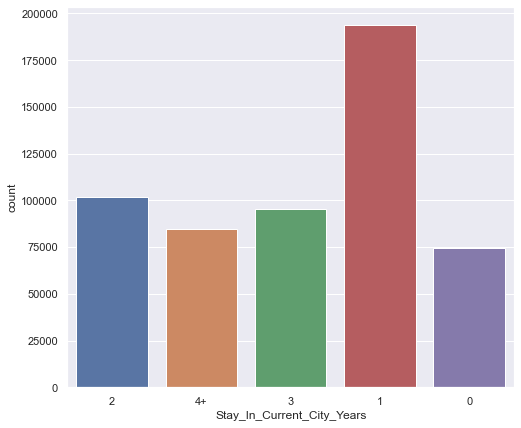

In [10]:
# Now let's check for "Stay_In_Current_City_Years"  feature.

plt.figure(figsize = (8,7))
sns.countplot(data = df, x ='Stay_In_Current_City_Years')
plt.show()

Here we can clearly see that the people who spend 1 year in the city are the most buyer. The older like who lives 2,3,4+ years are the almost same number and the people who are new to the city has the lowest count

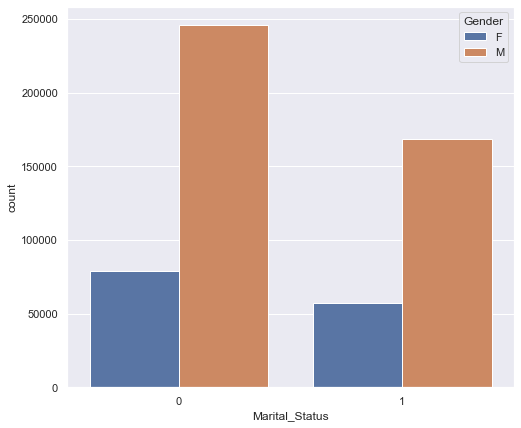

In [11]:
# check for the marital status
plt.figure(figsize = (8,7))
sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender')
plt.show()

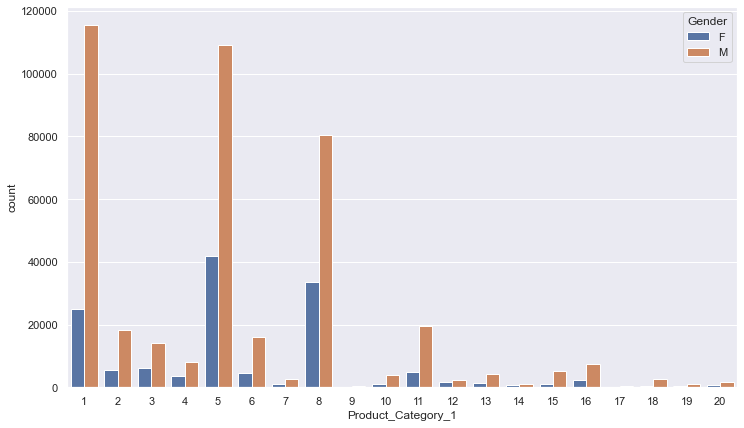

In [12]:
# Let's check how much "Product_category_1" sold based on "Gender" feature

plt.figure(figsize = (12,7))
sns.countplot(data = df, x = 'Product_Category_1', hue = 'Gender')
plt.show()

Here 'Product_category_1' 1,5, 8 has the highest count for both male & female customer

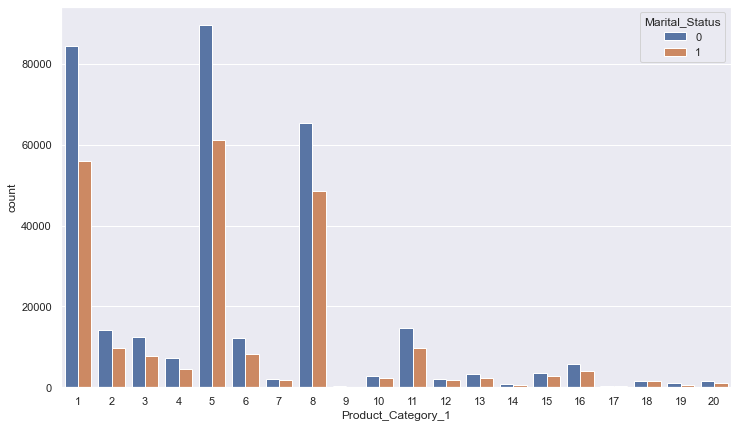

In [13]:
# Let's check how much "Product_category_1" sold based on "Marital_Status" feature
plt.figure(figsize = (12,7))
sns.countplot(data = df, x = 'Product_Category_1', hue = 'Marital_Status')
plt.show()

Here the same category product found that is like previous plot

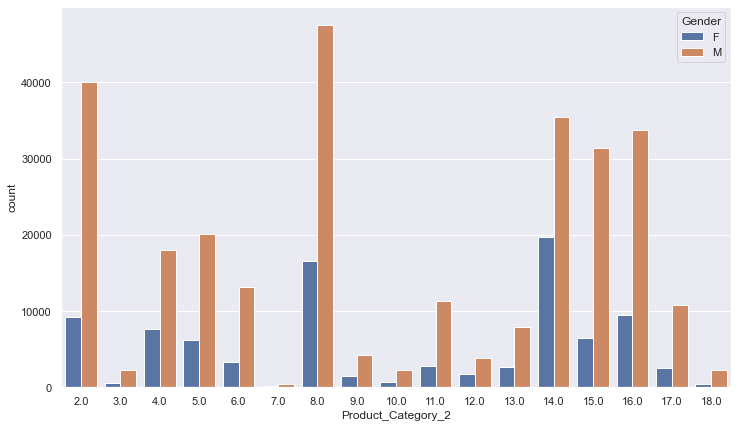

In [14]:
# Let's check how much "Product_category_2" sold based on "Gender" feature

plt.figure(figsize = (12,7))
sns.countplot(data = df, x = 'Product_Category_2', hue = 'Gender')
plt.show()

we can clearly see that from "product_category_1" the item "2, 8, 14, 15, 16" sold most previously

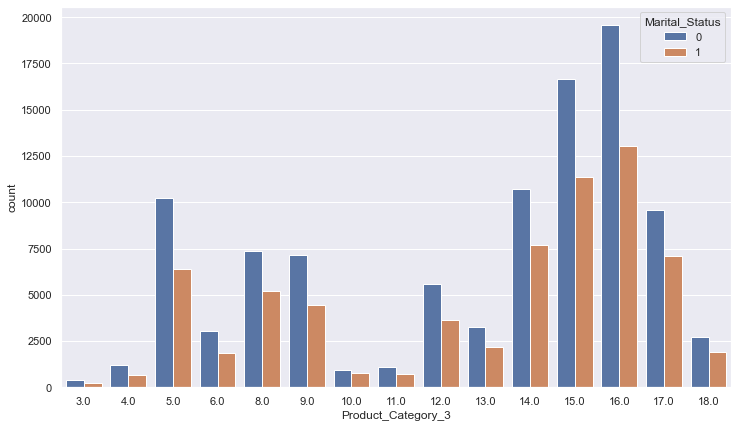

In [15]:
# Let's check how much "Product_category_3" sold based on "Marital_Status" feature
plt.figure(figsize = (12,7))
sns.countplot(data = df, x = 'Product_Category_3', hue = 'Marital_Status')
plt.show()

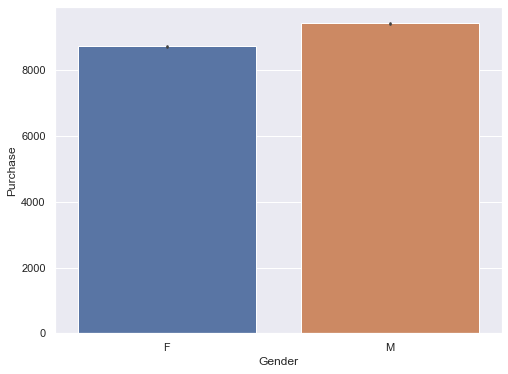

In [16]:
# Now, Let's check the relationships with the target variable
# visualize Gender with Purchase
plt.figure(figsize = (8,6))
sns.barplot(x = 'Gender', y = 'Purchase', data = df)
plt.show()

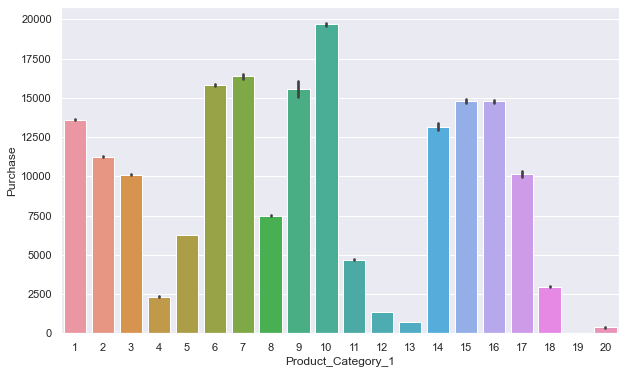

In [17]:
# visualize Product_Category_1 & Purchase
plt.figure(figsize = (10,6))
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = df)
plt.show()

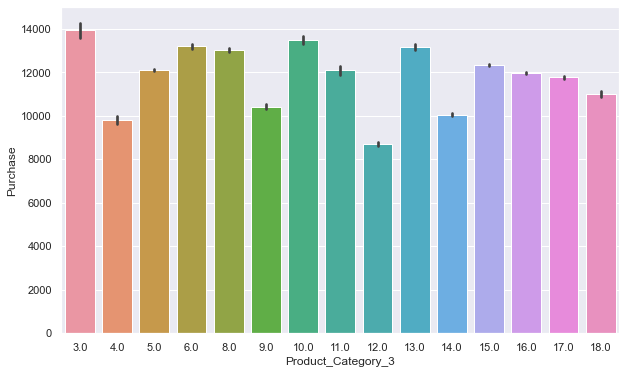

In [18]:
# visualize Product_Category_3 & Purchase
plt.figure(figsize = (10,6))
sns.barplot(x = 'Product_Category_3', y = 'Purchase', data = df)
plt.show()

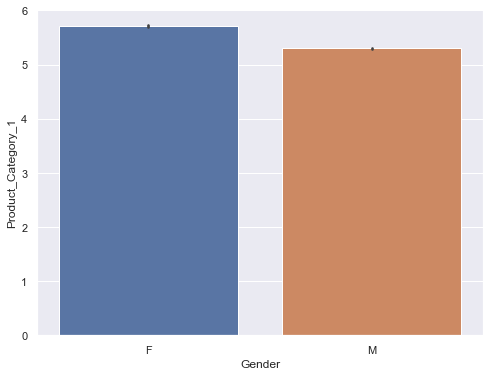

In [19]:
# check for gender & product category
plt.figure(figsize = (8,6))
sns.barplot(x = 'Gender', y = 'Product_Category_1', data = df)
plt.show()

Let's visualize some boxplot. This will also helps us to understand if there are some outlier or not in this dataset

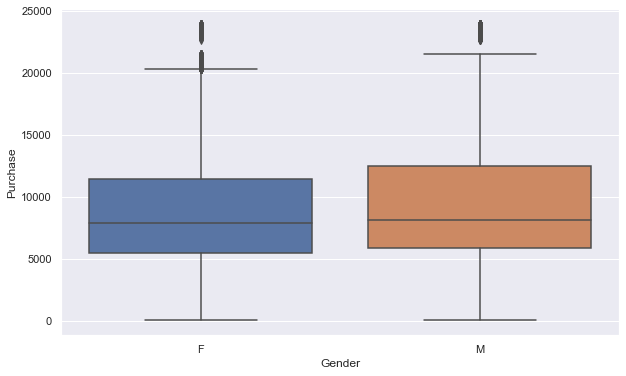

In [20]:
# viualize Purchase based on gender
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')
plt.show()

Here for both category in the dataset some outlier is found. Which may take care later

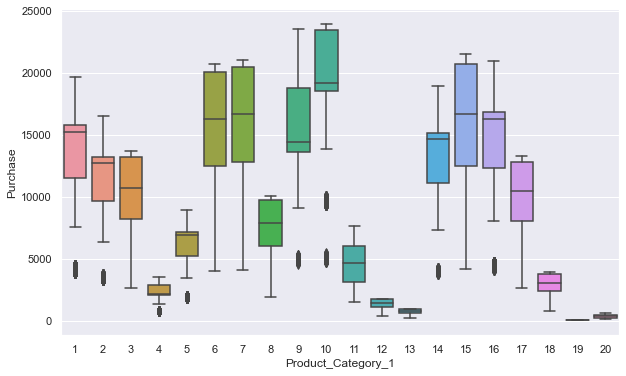

In [21]:
# viualize Purchase based on Product_Category_1
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Product_Category_1', y = 'Purchase')
plt.show()

For Category 1 there are almost 20 categoris and have some outliers

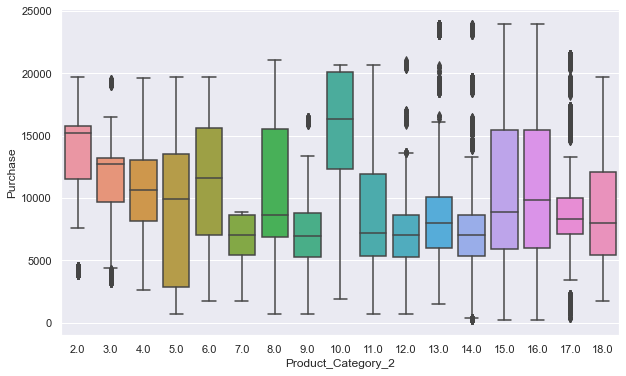

In [22]:
# viualize Purchase based on Product_Category_2
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Product_Category_2', y = 'Purchase')
plt.show()

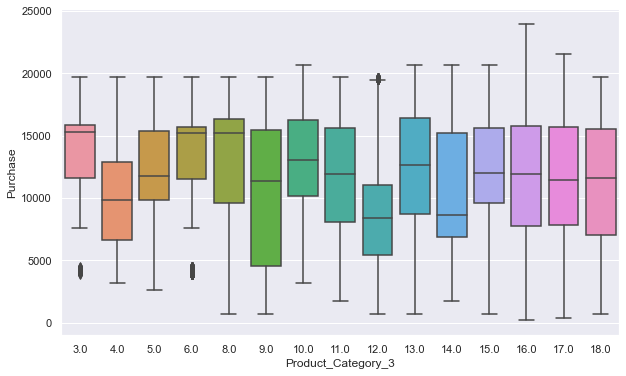

In [23]:
# viualize Purchase based on Product_Category_3
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'Product_Category_3', y = 'Purchase')
plt.show()

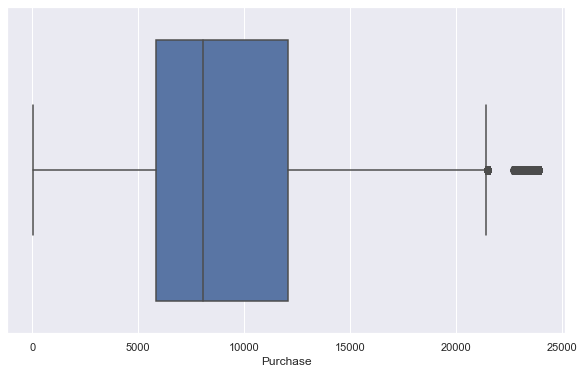

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot(df['Purchase'])
plt.show()

The target has also some outliers

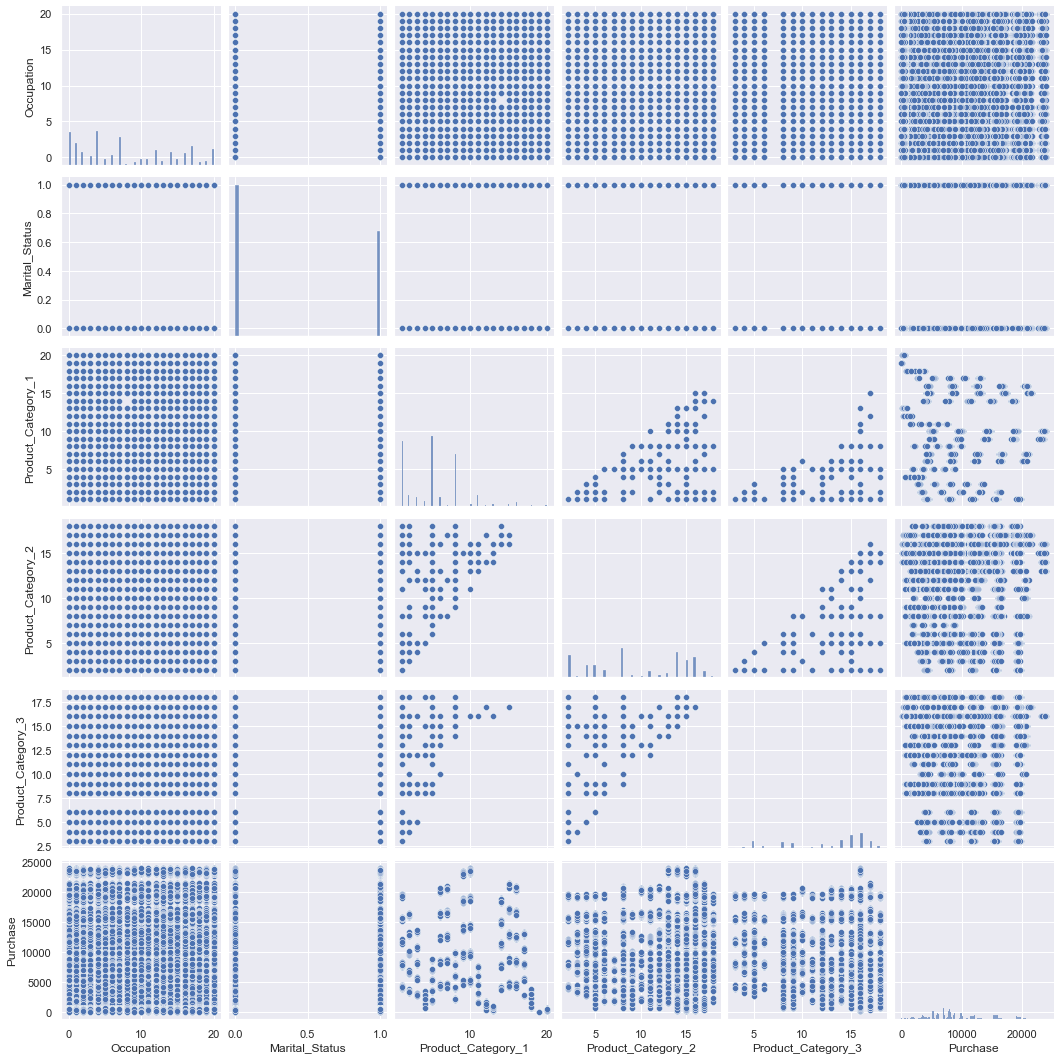

In [25]:
# let's see a pair plot so that we can interpret easily to all the features
sns.pairplot(df.drop(['User_ID', 'Product_ID'], axis = 1))
plt.show()

##### This is the end of exploratory data analysis for black friday price prediction. In the next notebook I'll show how to perform feature engineering and feature selection for machine learning.